# Forecasting Chicken Prices in Malaysia
## By: Muhammad Iqbal Abu Talib

Food prices in Malaysia have been increasing steadily in recent months, due to a combination of factors, including: weaking ringgit, climate change affecting crops, supply chain disruptions leading to overall lack of exported foods. 

Malaysia is a net importer of food, meaning that it imports more food than it exports. This makes the country vulnerable to rising global food prices.

The increasing food prices in Malaysia are having a significant impact on consumers, especially low-income households. Food spending accounts for a large proportion of household income in Malaysia; increasing food prices leads to reduced purchasing power and less food per previous food budgets. 

Many people are struggling to keep up with the rising cost of living.

Chicken is a crucial and the main protein consumed in Malaysia. Forecasting chicken prices in Malaysia would allow consumers to greater information to chicken prices and allow consumers to appropriately budget food expenses or perhaps even buy chicken when it's predicted to be it's lowest price - creating greater food savings to be put towards other expenses.  

# Importing Dataset

This dataset was obtained from "data.gov.my" a Malaysian Government initiative to publish statistics from multiple ministries into various data catalogues. 

The dataset being used here is from the Price Catcher dataset, an initiative from the Ministry of Domestic Trade and Costs of Living to track the prices of a variety of food items from multiple locations. In this model, we'll be consolidating and averaging the price of chicken per kg into a time-series for ARIMA model prediction.  

In [1]:
#THIS WILL TAKE A LONG TIME AND ROUGHLY 1.5GB OF SPACE TO STORE
import pandas as pd

Jan_22 = 'https://storage.data.gov.my/pricecatcher/pricecatcher_2022-01.parquet'
Feb_22 = 'https://storage.data.gov.my/pricecatcher/pricecatcher_2022-02.parquet'
Mar_22 = 'https://storage.data.gov.my/pricecatcher/pricecatcher_2022-03.parquet'
Apr_22 = 'https://storage.data.gov.my/pricecatcher/pricecatcher_2022-04.parquet'
May_22 = 'https://storage.data.gov.my/pricecatcher/pricecatcher_2022-05.parquet'
Jun_22 = 'https://storage.data.gov.my/pricecatcher/pricecatcher_2022-06.parquet'
Jul_22 = 'https://storage.data.gov.my/pricecatcher/pricecatcher_2022-07.parquet'
Aug_22 = 'https://storage.data.gov.my/pricecatcher/pricecatcher_2022-08.parquet'
Sep_22 = 'https://storage.data.gov.my/pricecatcher/pricecatcher_2022-09.parquet'
Oct_22 = 'https://storage.data.gov.my/pricecatcher/pricecatcher_2022-10.parquet'
Nov_22 = 'https://storage.data.gov.my/pricecatcher/pricecatcher_2022-11.parquet'
Dec_22 = 'https://storage.data.gov.my/pricecatcher/pricecatcher_2022-12.parquet'

Jan_23 = 'https://storage.data.gov.my/pricecatcher/pricecatcher_2023-01.parquet'
Feb_23 = 'https://storage.data.gov.my/pricecatcher/pricecatcher_2023-02.parquet' 
Mar_23 = 'https://storage.data.gov.my/pricecatcher/pricecatcher_2023-03.parquet'
Apr_23 = 'https://storage.data.gov.my/pricecatcher/pricecatcher_2023-04.parquet'
May_23 = 'https://storage.data.gov.my/pricecatcher/pricecatcher_2023-05.parquet'
Jun_23 = 'https://storage.data.gov.my/pricecatcher/pricecatcher_2023-06.parquet'
Jul_23 = 'https://storage.data.gov.my/pricecatcher/pricecatcher_2023-07.parquet'
Aug_23 = 'https://storage.data.gov.my/pricecatcher/pricecatcher_2023-08.parquet'
Sep_23 = 'https://storage.data.gov.my/pricecatcher/pricecatcher_2023-09.parquet'

# Read the dataframes
Jan_22 = pd.read_parquet(Jan_22)
Feb_22 = pd.read_parquet(Feb_22)
Mar_22 = pd.read_parquet(Mar_22)
Apr_22 = pd.read_parquet(Apr_22)
May_22 = pd.read_parquet(May_22)
Jun_22 = pd.read_parquet(Jun_22)
Jul_22 = pd.read_parquet(Jul_22)
Aug_22 = pd.read_parquet(Aug_22)
Sep_22 = pd.read_parquet(Sep_22)
Oct_22 = pd.read_parquet(Oct_22)
Nov_22 = pd.read_parquet(Nov_22)
Dec_22 = pd.read_parquet(Dec_22)

Jan_23 = pd.read_parquet(Jan_23)
Feb_23 = pd.read_parquet(Feb_23)
Mar_23 = pd.read_parquet(Mar_23)
Apr_23 = pd.read_parquet(Apr_23)
May_23 = pd.read_parquet(May_23)
Jun_23 = pd.read_parquet(Jun_23)
Jul_23 = pd.read_parquet(Jul_23)
Aug_23 = pd.read_parquet(Aug_23)
Sep_23 = pd.read_parquet(Sep_23)

# Concatenate the dataframes
pc = pd.concat([Jan_22, Feb_22, Mar_22, Apr_22, May_22, Jun_22, Jul_22, Aug_22, Sep_22, Oct_22, Nov_22, Dec_22, 
                     Jan_23, Feb_23, Mar_23, Apr_23, May_23, Jun_23, Jul_22, Aug_22, Sep_22], ignore_index=True)

# Print the combined dataframe
print(pc)


                         date  premise_code  item_code  price
0         2022-01-01 00:00:00             2          1    9.1
1         2022-01-01 00:00:00             2          9   36.0
2         2022-01-01 00:00:00             2         14   24.0
3         2022-01-01 00:00:00             2         16    4.3
4         2022-01-01 00:00:00             2         18    4.5
...                       ...           ...        ...    ...
48940459  2022-09-30 00:00:00         20857       1940    7.5
48940460  2022-09-30 00:00:00         20857       1942   32.5
48940461  2022-09-30 00:00:00         20857       1943   15.5
48940462  2022-09-30 00:00:00         20857       1944    7.9
48940463  2022-09-30 00:00:00         20857       1946    1.3

[48940464 rows x 4 columns]


In [2]:
# Save PC as backup without importing it all again
pc_backup = pc.copy()

In [3]:
print(pc_backup)

                         date  premise_code  item_code  price
0         2022-01-01 00:00:00             2          1    9.1
1         2022-01-01 00:00:00             2          9   36.0
2         2022-01-01 00:00:00             2         14   24.0
3         2022-01-01 00:00:00             2         16    4.3
4         2022-01-01 00:00:00             2         18    4.5
...                       ...           ...        ...    ...
48940459  2022-09-30 00:00:00         20857       1940    7.5
48940460  2022-09-30 00:00:00         20857       1942   32.5
48940461  2022-09-30 00:00:00         20857       1943   15.5
48940462  2022-09-30 00:00:00         20857       1944    7.9
48940463  2022-09-30 00:00:00         20857       1946    1.3

[48940464 rows x 4 columns]


In [4]:
# Reload PC without importing it all again
#pc = pc_backup.copy()

In [5]:
print(pc)

                         date  premise_code  item_code  price
0         2022-01-01 00:00:00             2          1    9.1
1         2022-01-01 00:00:00             2          9   36.0
2         2022-01-01 00:00:00             2         14   24.0
3         2022-01-01 00:00:00             2         16    4.3
4         2022-01-01 00:00:00             2         18    4.5
...                       ...           ...        ...    ...
48940459  2022-09-30 00:00:00         20857       1940    7.5
48940460  2022-09-30 00:00:00         20857       1942   32.5
48940461  2022-09-30 00:00:00         20857       1943   15.5
48940462  2022-09-30 00:00:00         20857       1944    7.9
48940463  2022-09-30 00:00:00         20857       1946    1.3

[48940464 rows x 4 columns]


# Cleaning Dataset

In [6]:
pc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48940464 entries, 0 to 48940463
Data columns (total 4 columns):
 #   Column        Dtype  
---  ------        -----  
 0   date          object 
 1   premise_code  int64  
 2   item_code     int64  
 3   price         float64
dtypes: float64(1), int64(2), object(1)
memory usage: 1.5+ GB


In [7]:
#The item code carries the information of the prices at each location but the individual locations are not needed
pc.drop('premise_code', axis=1, inplace=True)

In [8]:
print(pc)

                         date  item_code  price
0         2022-01-01 00:00:00          1    9.1
1         2022-01-01 00:00:00          9   36.0
2         2022-01-01 00:00:00         14   24.0
3         2022-01-01 00:00:00         16    4.3
4         2022-01-01 00:00:00         18    4.5
...                       ...        ...    ...
48940459  2022-09-30 00:00:00       1940    7.5
48940460  2022-09-30 00:00:00       1942   32.5
48940461  2022-09-30 00:00:00       1943   15.5
48940462  2022-09-30 00:00:00       1944    7.9
48940463  2022-09-30 00:00:00       1946    1.3

[48940464 rows x 3 columns]


In [9]:
# Remove item codes that are not 1 (Standard Chicken)
pc = pc[pc['item_code'] == 1]

In [10]:
print(pc)

                         date  item_code  price
0         2022-01-01 00:00:00          1   9.10
932       2022-01-01 00:00:00          1   8.90
1152      2022-01-01 00:00:00          1   8.30
1386      2022-01-01 00:00:00          1   8.99
1611      2022-01-01 00:00:00          1   8.60
...                       ...        ...    ...
48940022  2022-09-30 00:00:00          1   7.99
48940126  2022-09-30 00:00:00          1   8.59
48940180  2022-09-30 00:00:00          1   9.40
48940220  2022-09-30 00:00:00          1   8.99
48940359  2022-09-30 00:00:00          1   8.50

[382094 rows x 3 columns]


In [11]:
#Format Date
pc['date']=pd.to_datetime(pc['date'], format ='%Y-%m-%d %H:%M:%S').dt.to_period('D')

C:\Users\ashba\AppData\Local\Temp\ipykernel_25672\2892816715.py:1: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  pc['date']=pd.to_datetime(pc['date'], format ='%Y-%m-%d %H:%M:%S').dt.to_period('D')
C:\Users\ashba\AppData\Local\Temp\ipykernel_25672\2892816715.py:1: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  pc['date']=pd.to_datetime(pc['date'], format ='%Y-%m-%d %H:%M:%S').dt.to_period('D')


In [12]:
print(pc)

                date  item_code  price
0         2022-01-01          1   9.10
932       2022-01-01          1   8.90
1152      2022-01-01          1   8.30
1386      2022-01-01          1   8.99
1611      2022-01-01          1   8.60
...              ...        ...    ...
48940022  2022-09-30          1   7.99
48940126  2022-09-30          1   8.59
48940180  2022-09-30          1   9.40
48940220  2022-09-30          1   8.99
48940359  2022-09-30          1   8.50

[382094 rows x 3 columns]


In [13]:
# Group the dataframe by date and item code
grouped_df = pc.groupby(['date', 'item_code'])

# Mean of the price for each item code
df = grouped_df['price'].mean().reset_index()

print(df)

           date  item_code     price
0    2022-01-01          1  8.892784
1    2022-01-02          1  8.870105
2    2022-01-03          1  8.876982
3    2022-01-04          1  8.863942
4    2022-01-05          1  8.864115
..          ...        ...       ...
512  2023-06-25          1  9.304273
513  2023-06-26          1  9.364052
514  2023-06-27          1  9.351388
515  2023-06-28          1  9.344156
516  2023-06-30          1  9.379229

[517 rows x 3 columns]


# Date Time Index

In [14]:
df.head()

,date,item_code,price
0,2022-01-01,1,8.892784
1,2022-01-02,1,8.870105
2,2022-01-03,1,8.876982
3,2022-01-04,1,8.863942
4,2022-01-05,1,8.864115


In [15]:
#Set date as index
df.set_index('date', inplace=True, drop=True)
df.head()

,item_code,price
date,,
2022-01-01,1,8.892784
2022-01-02,1,8.870105
2022-01-03,1,8.876982
2022-01-04,1,8.863942
2022-01-05,1,8.864115


In [16]:
df.drop('item_code', axis=1, inplace=True)

In [17]:
print(df)

               price
date                
2022-01-01  8.892784
2022-01-02  8.870105
2022-01-03  8.876982
2022-01-04  8.863942
2022-01-05  8.864115
...              ...
2023-06-25  9.304273
2023-06-26  9.364052
2023-06-27  9.351388
2023-06-28  9.344156
2023-06-30  9.379229

[517 rows x 1 columns]


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 517 entries, 2022-01-01 to 2023-06-30
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   517 non-null    float64
dtypes: float64(1)
memory usage: 8.1 KB


In [19]:
df.head(10)

,price
date,
2022-01-01,8.892784
2022-01-02,8.870105
2022-01-03,8.876982
2022-01-04,8.863942
2022-01-05,8.864115
2022-01-06,8.871841
2022-01-07,8.862333
2022-01-08,8.855785
2022-01-09,8.864158


# Exploratory Data Analysis

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
np.set_printoptions(precision=4)
sns.set(font_scale=1.5)
plt.style.use('fivethirtyeight')

from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [21]:
summary_stats = df.describe()
print(summary_stats)

            price
count  517.000000
mean     9.027968
std      0.318249
min      7.789971
25%      8.819664
50%      9.005446
75%      9.324563
max     10.146154


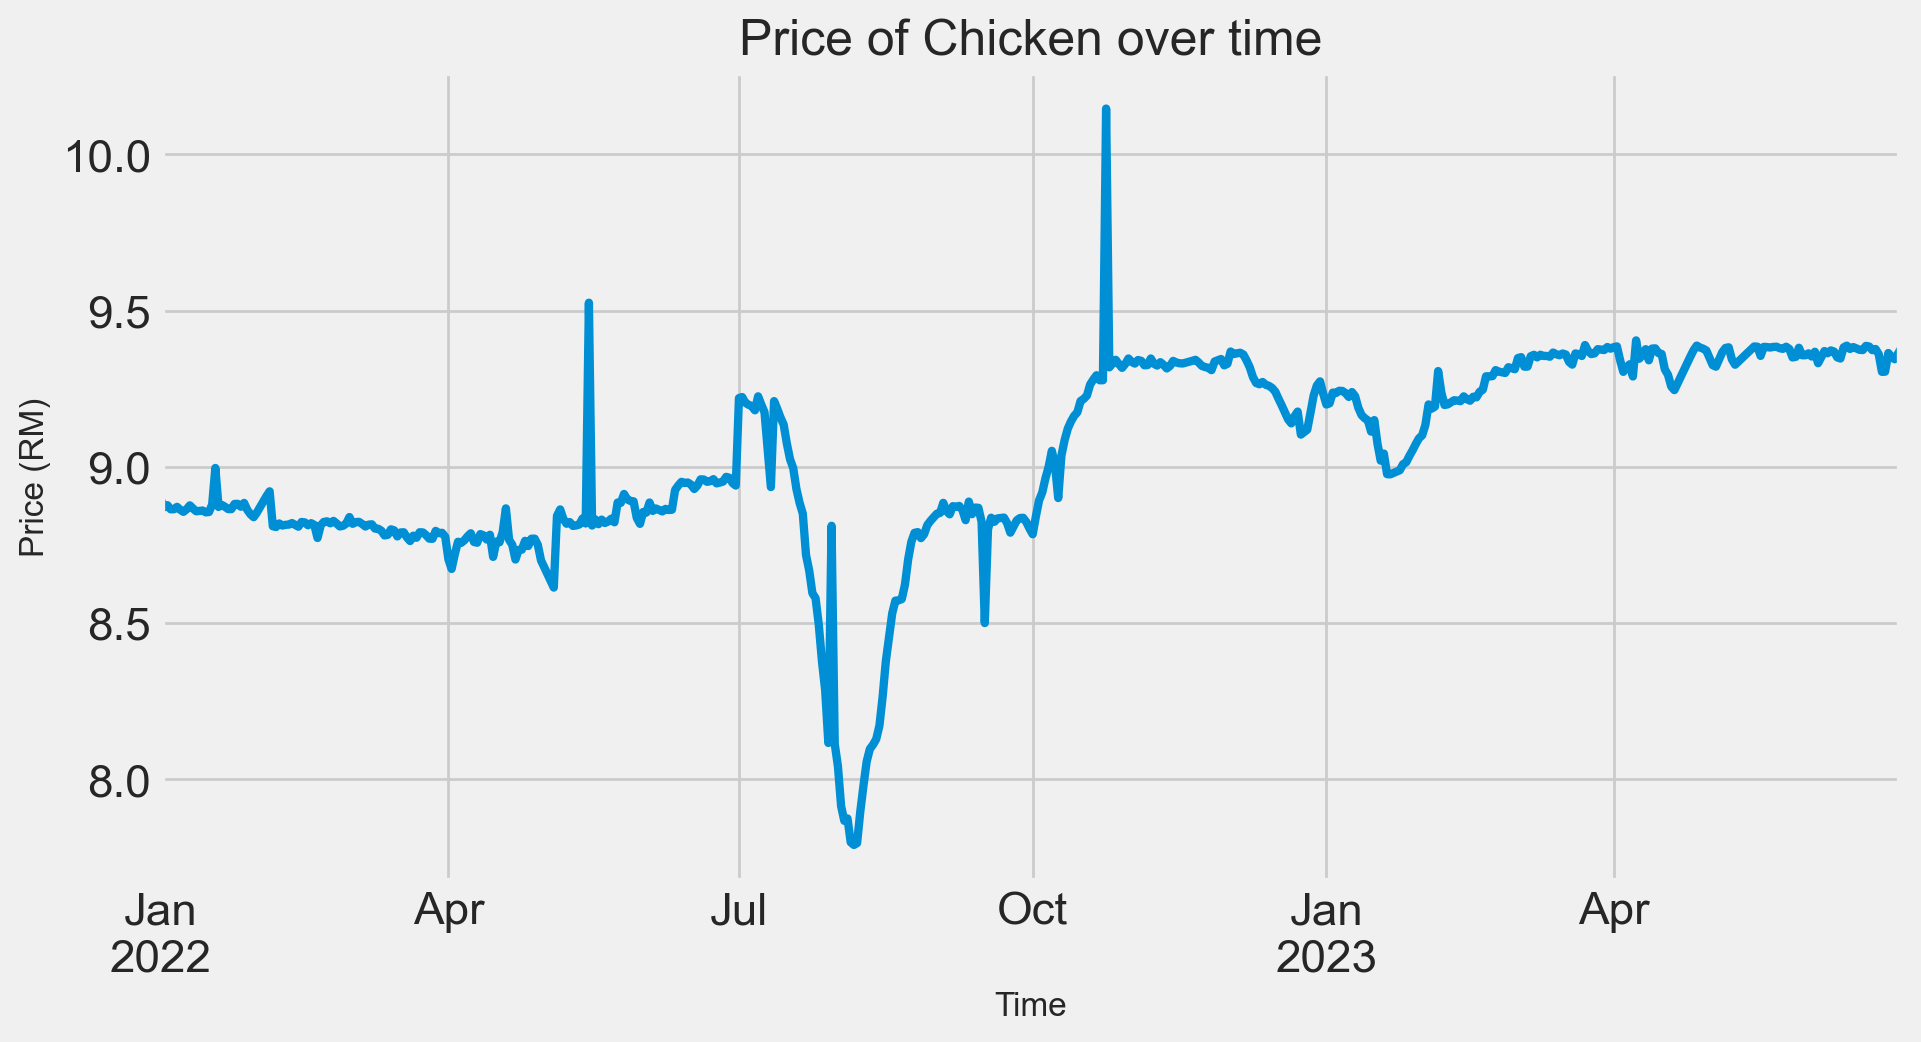

In [22]:
df['price'].plot(lw=3, figsize=(10,5))
plt.ylabel('Price (RM)', fontsize=12)
plt.xlabel('Time', fontsize=12)
plt.title('Price of Chicken over time',fontsize=18)
plt.show()

Plotting our price of chicken over time, displays sharp and momentary increases and decreases

However, by calculating statistical summaries, we can see that the standard deviation of chicken prices is only ± 0.32 and has only reached a maximum mean of RM10.1 per kg of chicken momentarily.

In [23]:
urate = df.price

In [24]:
def autocorr_plots(y, lags=None):
    fig, ax = plt.subplots(ncols=2, figsize=(20, 10), sharey=True)
    plot_acf(y, lags=lags, ax=ax[0])
    plot_pacf(y, lags=lags, ax=ax[1])
    return fig, ax

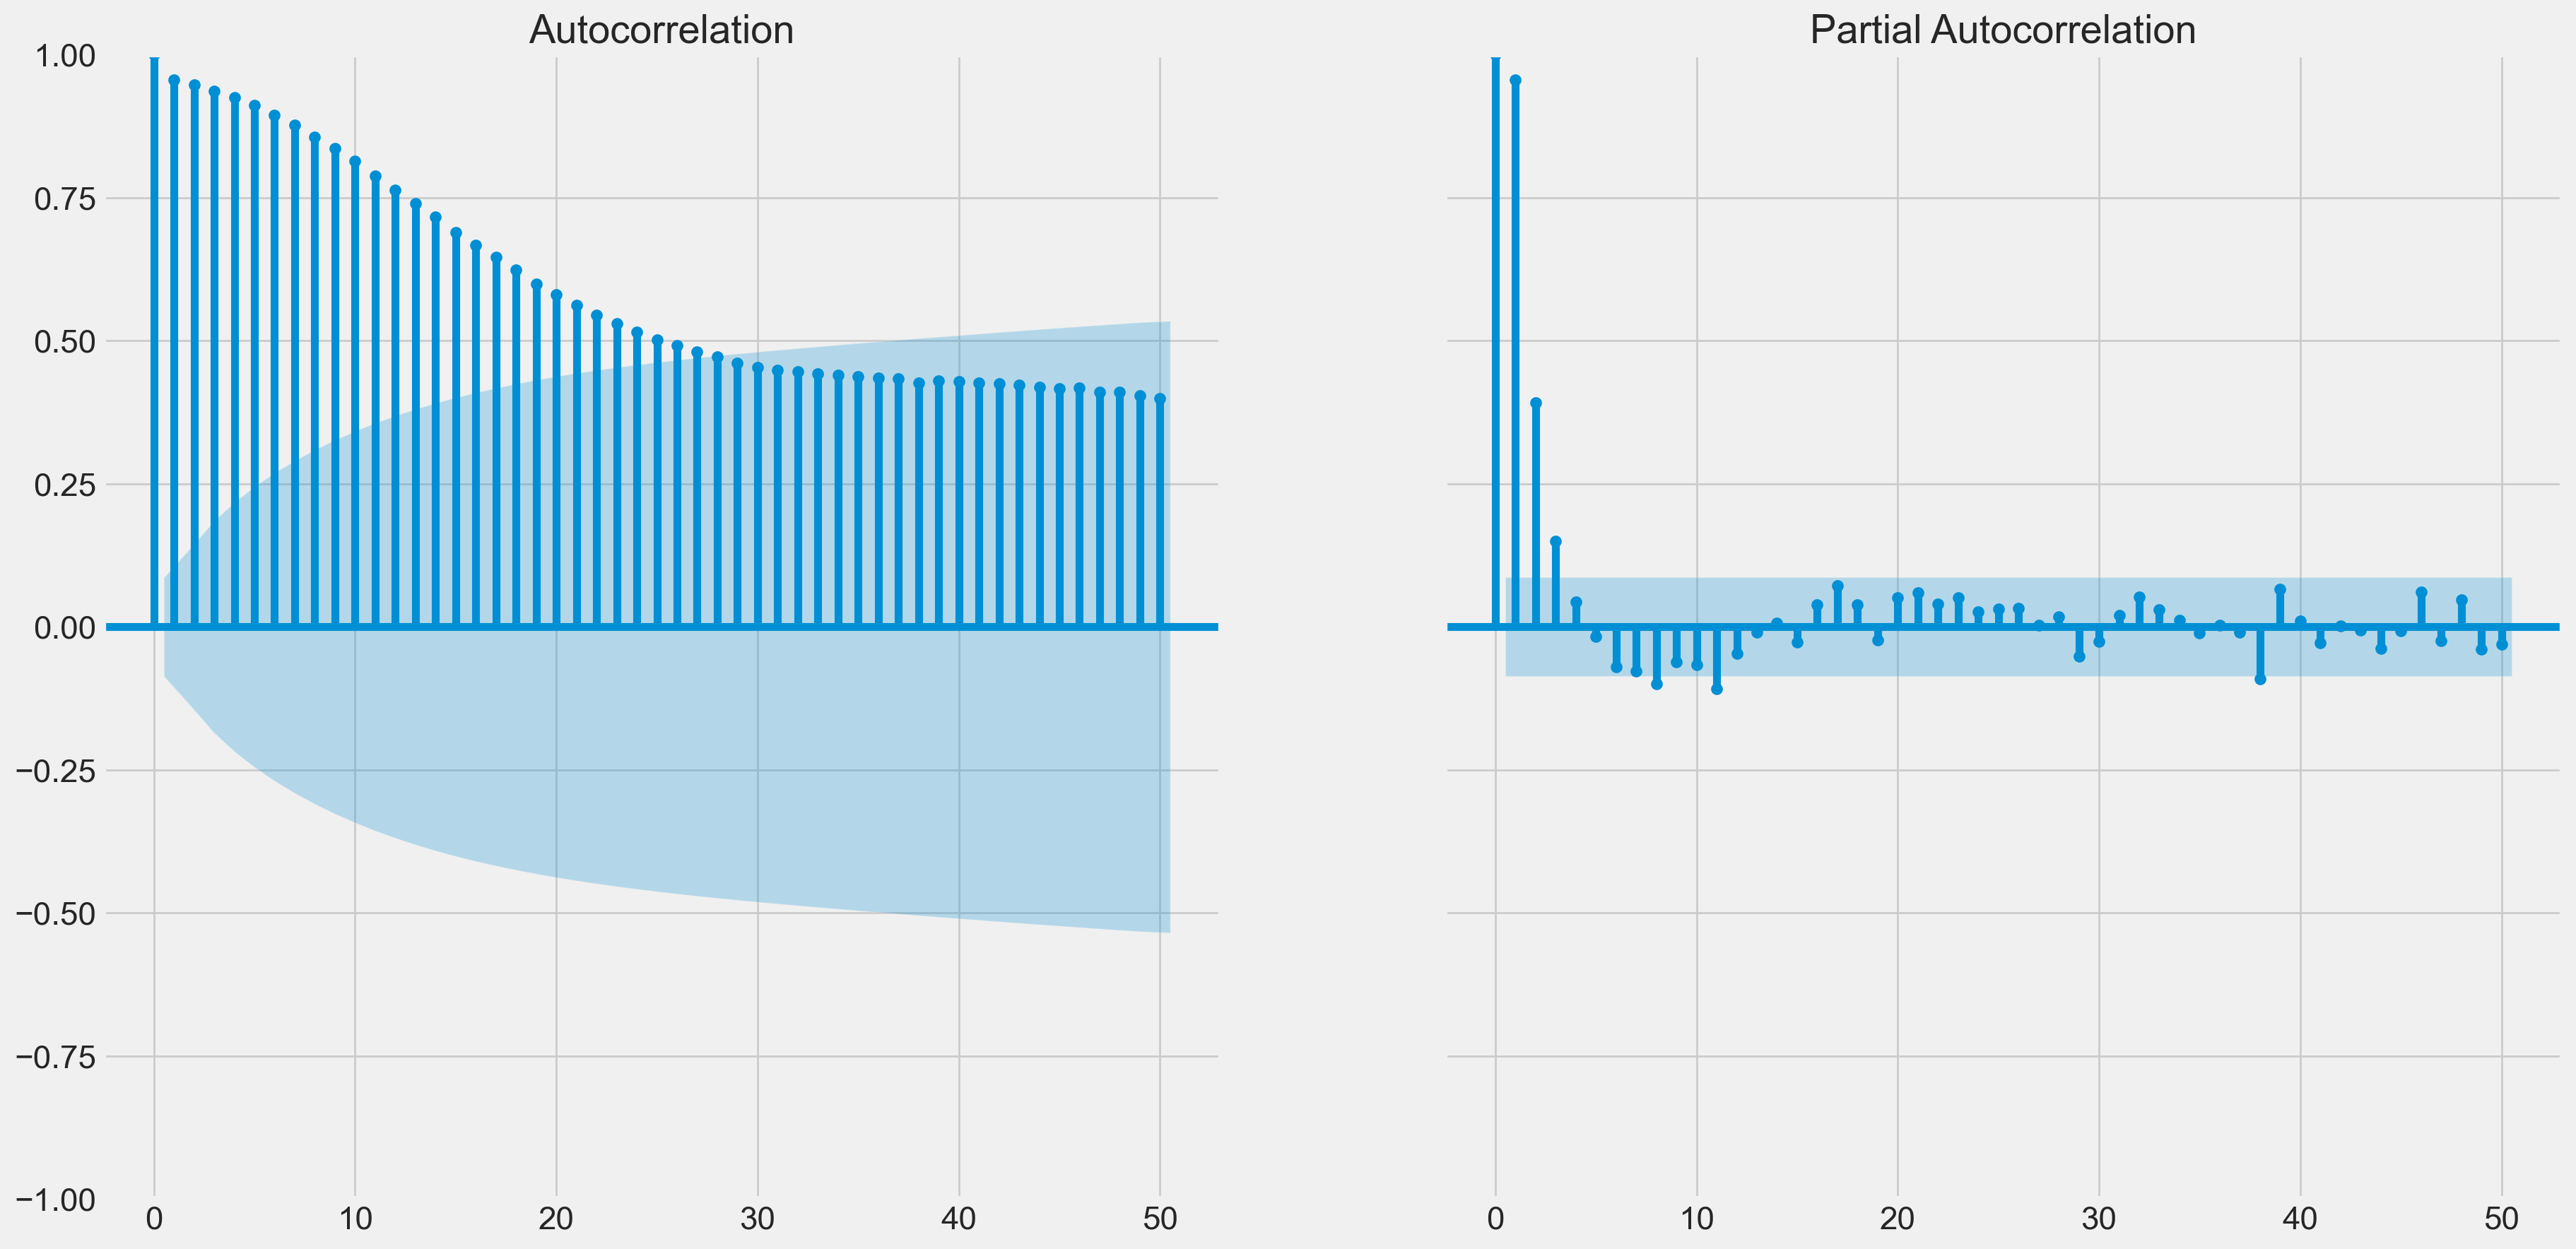

In [25]:
fig, ax = autocorr_plots(urate,lags=50)

In [26]:
from statsmodels.tsa.stattools import adfuller

# Adfuller to check p-value
adf_test = adfuller(urate)
print(f'p-value: {adf_test[1]}')

p-value: 0.07545154936639412


Based on our autocorrelation observation and the p-value of 0.07 our dataset is non-stationary. Differentiation will be used to obtain a stationary series 

# Differentiation and Tuning

In [27]:
price_diff = df.price.diff()[1:]

In [28]:
print(price_diff)

date
2022-01-02   -0.022679
2022-01-03    0.006877
2022-01-04   -0.013039
2022-01-05    0.000173
2022-01-06    0.007726
                ...   
2023-06-25    0.000517
2023-06-26    0.059779
2023-06-27   -0.012665
2023-06-28   -0.007232
2023-06-30    0.035073
Freq: D, Name: price, Length: 516, dtype: float64


(<Figure size 2000x1000 with 2 Axes>,
 array([<Axes: title={'center': 'Autocorrelation'}>,
        <Axes: title={'center': 'Partial Autocorrelation'}>], dtype=object))

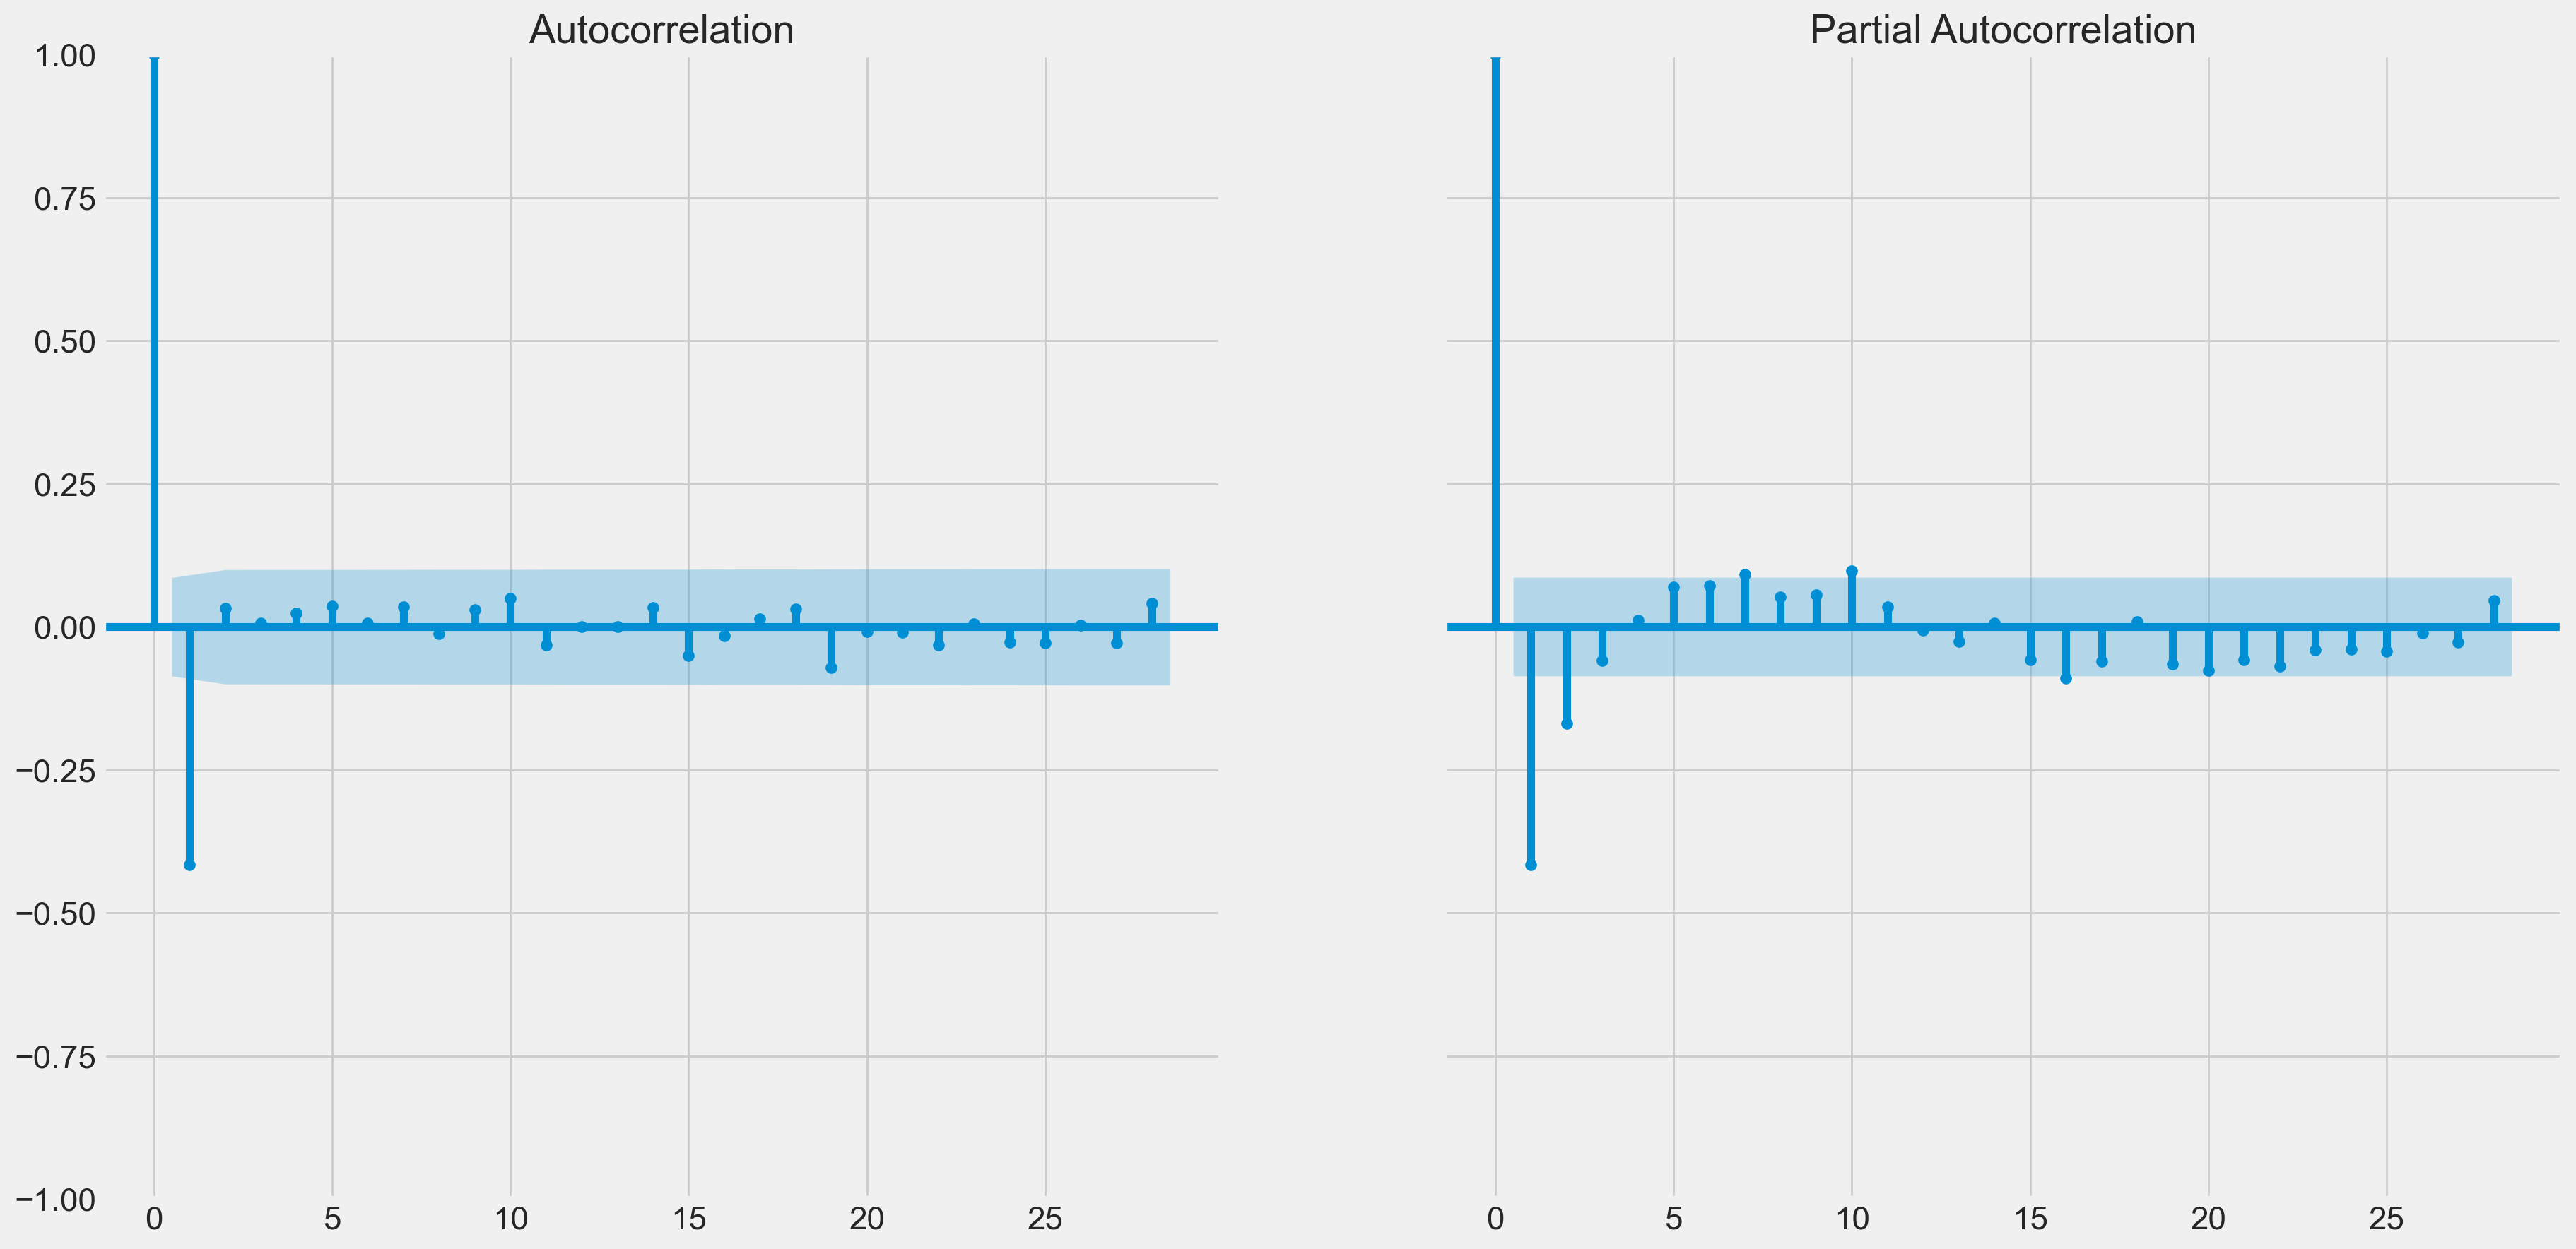

In [29]:
autocorr_plots(price_diff)

In [30]:
# Adfuller to check p-value
adf_test = adfuller(price_diff)
print(f'p-value: {adf_test[1]}')

p-value: 4.465889910916719e-06


Since our p-value is now lower than 5%, the series is stationary and able to be used for ARIMA

Based on the autocorrelation, partial autocorrelation, and p-value to obtain an ARIMA order of 2,1,1.

# ARIMA

In [31]:
# Train based on data from January 2022 to January 2023 
n = len(urate)-152
X_train= urate[:n]
X_test= urate[n:]

In [32]:
# n is the length of a year in days
print(n)

365


In [33]:
from statsmodels.tsa.arima.model import ARIMA

In [34]:
# p, d, q values obtained from differentiation
p=2 #PACF
d=1 #p-value
q=1 #ACF
model_ar=ARIMA(X_train, order=(p, d, q)).fit()
print(model_ar.summary())
print(model_ar.model.order)

                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                  365
Model:                 ARIMA(2, 1, 1)   Log Likelihood                 332.548
Date:                Mon, 16 Oct 2023   AIC                           -657.096
Time:                        16:44:07   BIC                           -641.507
Sample:                    01-01-2022   HQIC                          -650.900
                         - 01-13-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2712      0.191     -1.417      0.156      -0.646       0.104
ar.L2         -0.0805      0.092     -0.879      0.380      -0.260       0.099
ma.L1         -0.2336      0.193     -1.210      0.2

## SARIMAX Interpertation
Our high log likelihood score indicate that our data fits well into our model. Our negative AIC and BIC measures our model as an uncomplex model. 

Our Ljung-Box test scores indicate that there is no significant autocorrelation in the residuals. Our Jarque-Bera and Heteroskedasticity test scores indicate that the residuals are not normally distributed and have unequal residual variance over a range, respectively.

In [35]:
# Forecast 12 months
forecast = model_ar.forecast(len(X_test))

# Store the forecast values back in the dataframe, keeping those before the y_test as NaN
df['forecast'] = [None]*len(X_train) + list(forecast)

In [36]:
print(df)

               price  forecast
date                          
2022-01-01  8.892784       NaN
2022-01-02  8.870105       NaN
2022-01-03  8.876982       NaN
2022-01-04  8.863942       NaN
2022-01-05  8.864115       NaN
...              ...       ...
2023-06-25  9.304273  9.164549
2023-06-26  9.364052  9.164549
2023-06-27  9.351388  9.164549
2023-06-28  9.344156  9.164549
2023-06-30  9.379229  9.164549

[517 rows x 2 columns]


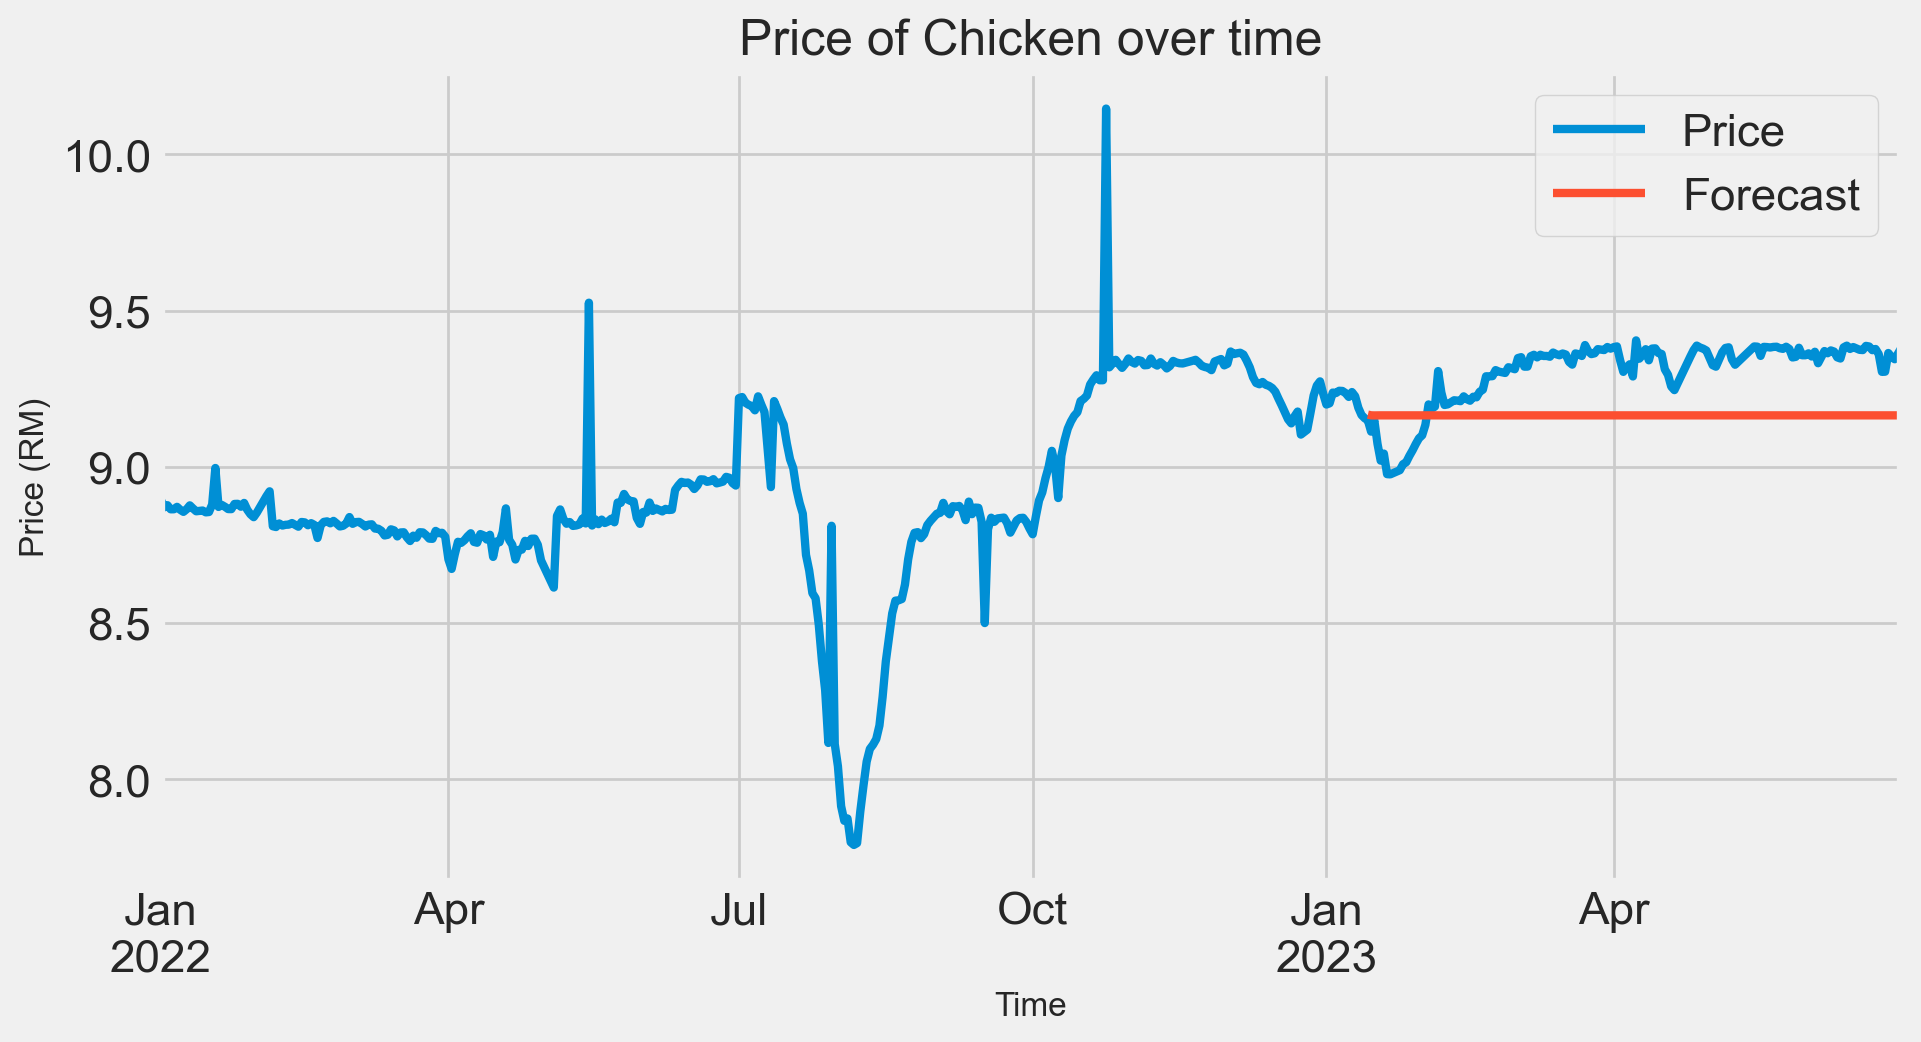

In [37]:
df['price'].plot(lw=3, figsize=(10,5), label='Price')
df['forecast'].plot(lw=3, figsize=(10,5), label='Forecast')
plt.legend()
plt.ylabel('Price (RM)', fontsize=12)
plt.xlabel('Time', fontsize=12)
plt.title('Price of Chicken over time',fontsize=18)
plt.show()

C:\Users\ashba\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['plot_insample']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


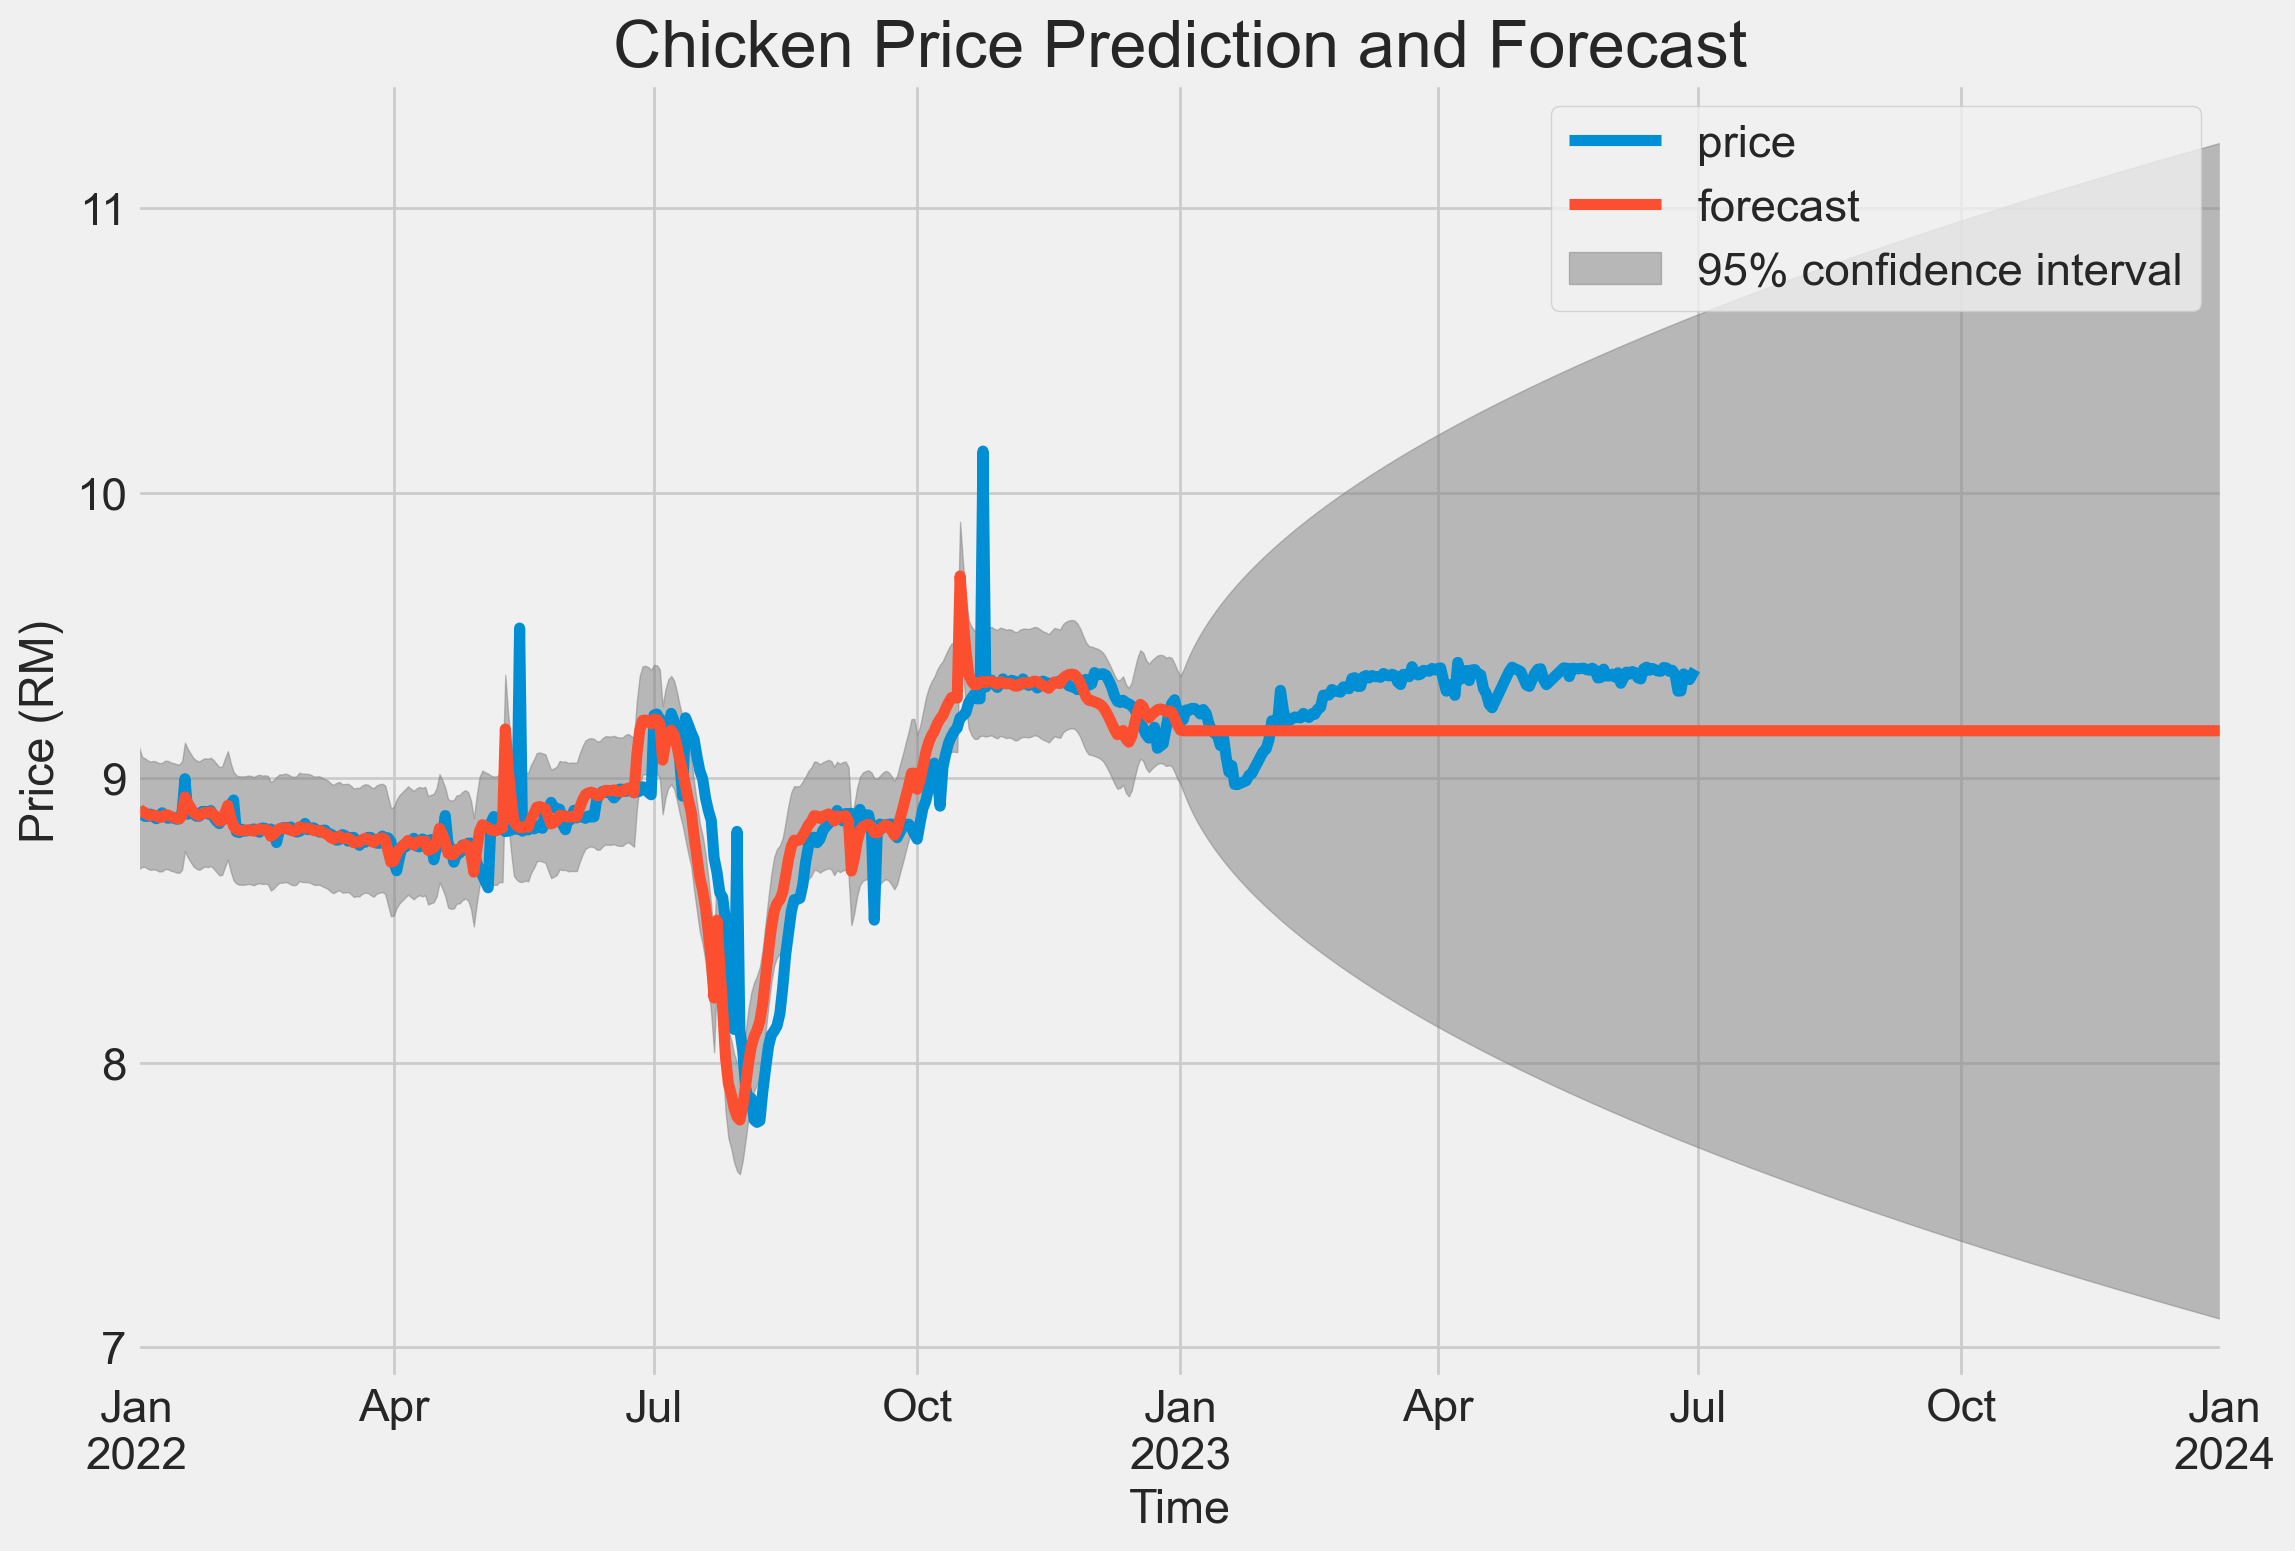

In [38]:
from statsmodels.graphics.tsaplots import plot_predict

# Start predicting from the start of 2023
init_1 = 1

# Predicting until the end of 2023
end_1 = len(urate)+213
fig, ax = plt.subplots(figsize=(12,8))
urate.plot()
plot_predict(model_ar,init_1,end_1,dynamic=False,plot_insample=True,ax=ax)
ax.set_title('Chicken Price Prediction and Forecast',fontsize=24)
ax.set_ylabel('Price (RM)')
ax.set_xlabel('Time')
plt.show()

# Model Evaluation

In [39]:
from scipy import stats
import statsmodels.api as sm

def residual_plot(res):
    resid_standard = (res - res.mean()) / res.std()

    figure, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

    ax[0, 0].plot(res)
    ax[0, 0].axhline(res.mean(), color='grey')
    ax[0, 0].set_title('Residuals')

    plot_acf(resid_standard, title='Correlogram', ax=ax[0, 1])

    sm.graphics.qqplot(res, line='45', fit=True, ax=ax[1, 0])
    ax[1, 0].set_title('Normal Q-Q')

    x = np.linspace(res.min(), res.max(), 1000)
    norm = stats.norm(loc=0, scale=res.std())
    sns.distplot(res, ax=ax[1, 1], label='kde estimate')
    ax[1, 1].plot(x, norm.pdf(x), label='normal distribution')
    ax[1, 1].legend()
    ax[1, 1].set_title('Distribution of Residuals')
    plt.tight_layout()
    plt.show()

C:\Users\ashba\AppData\Local\Temp\ipykernel_25672\1919325729.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, ax=ax[1, 1], label='kde estimate')


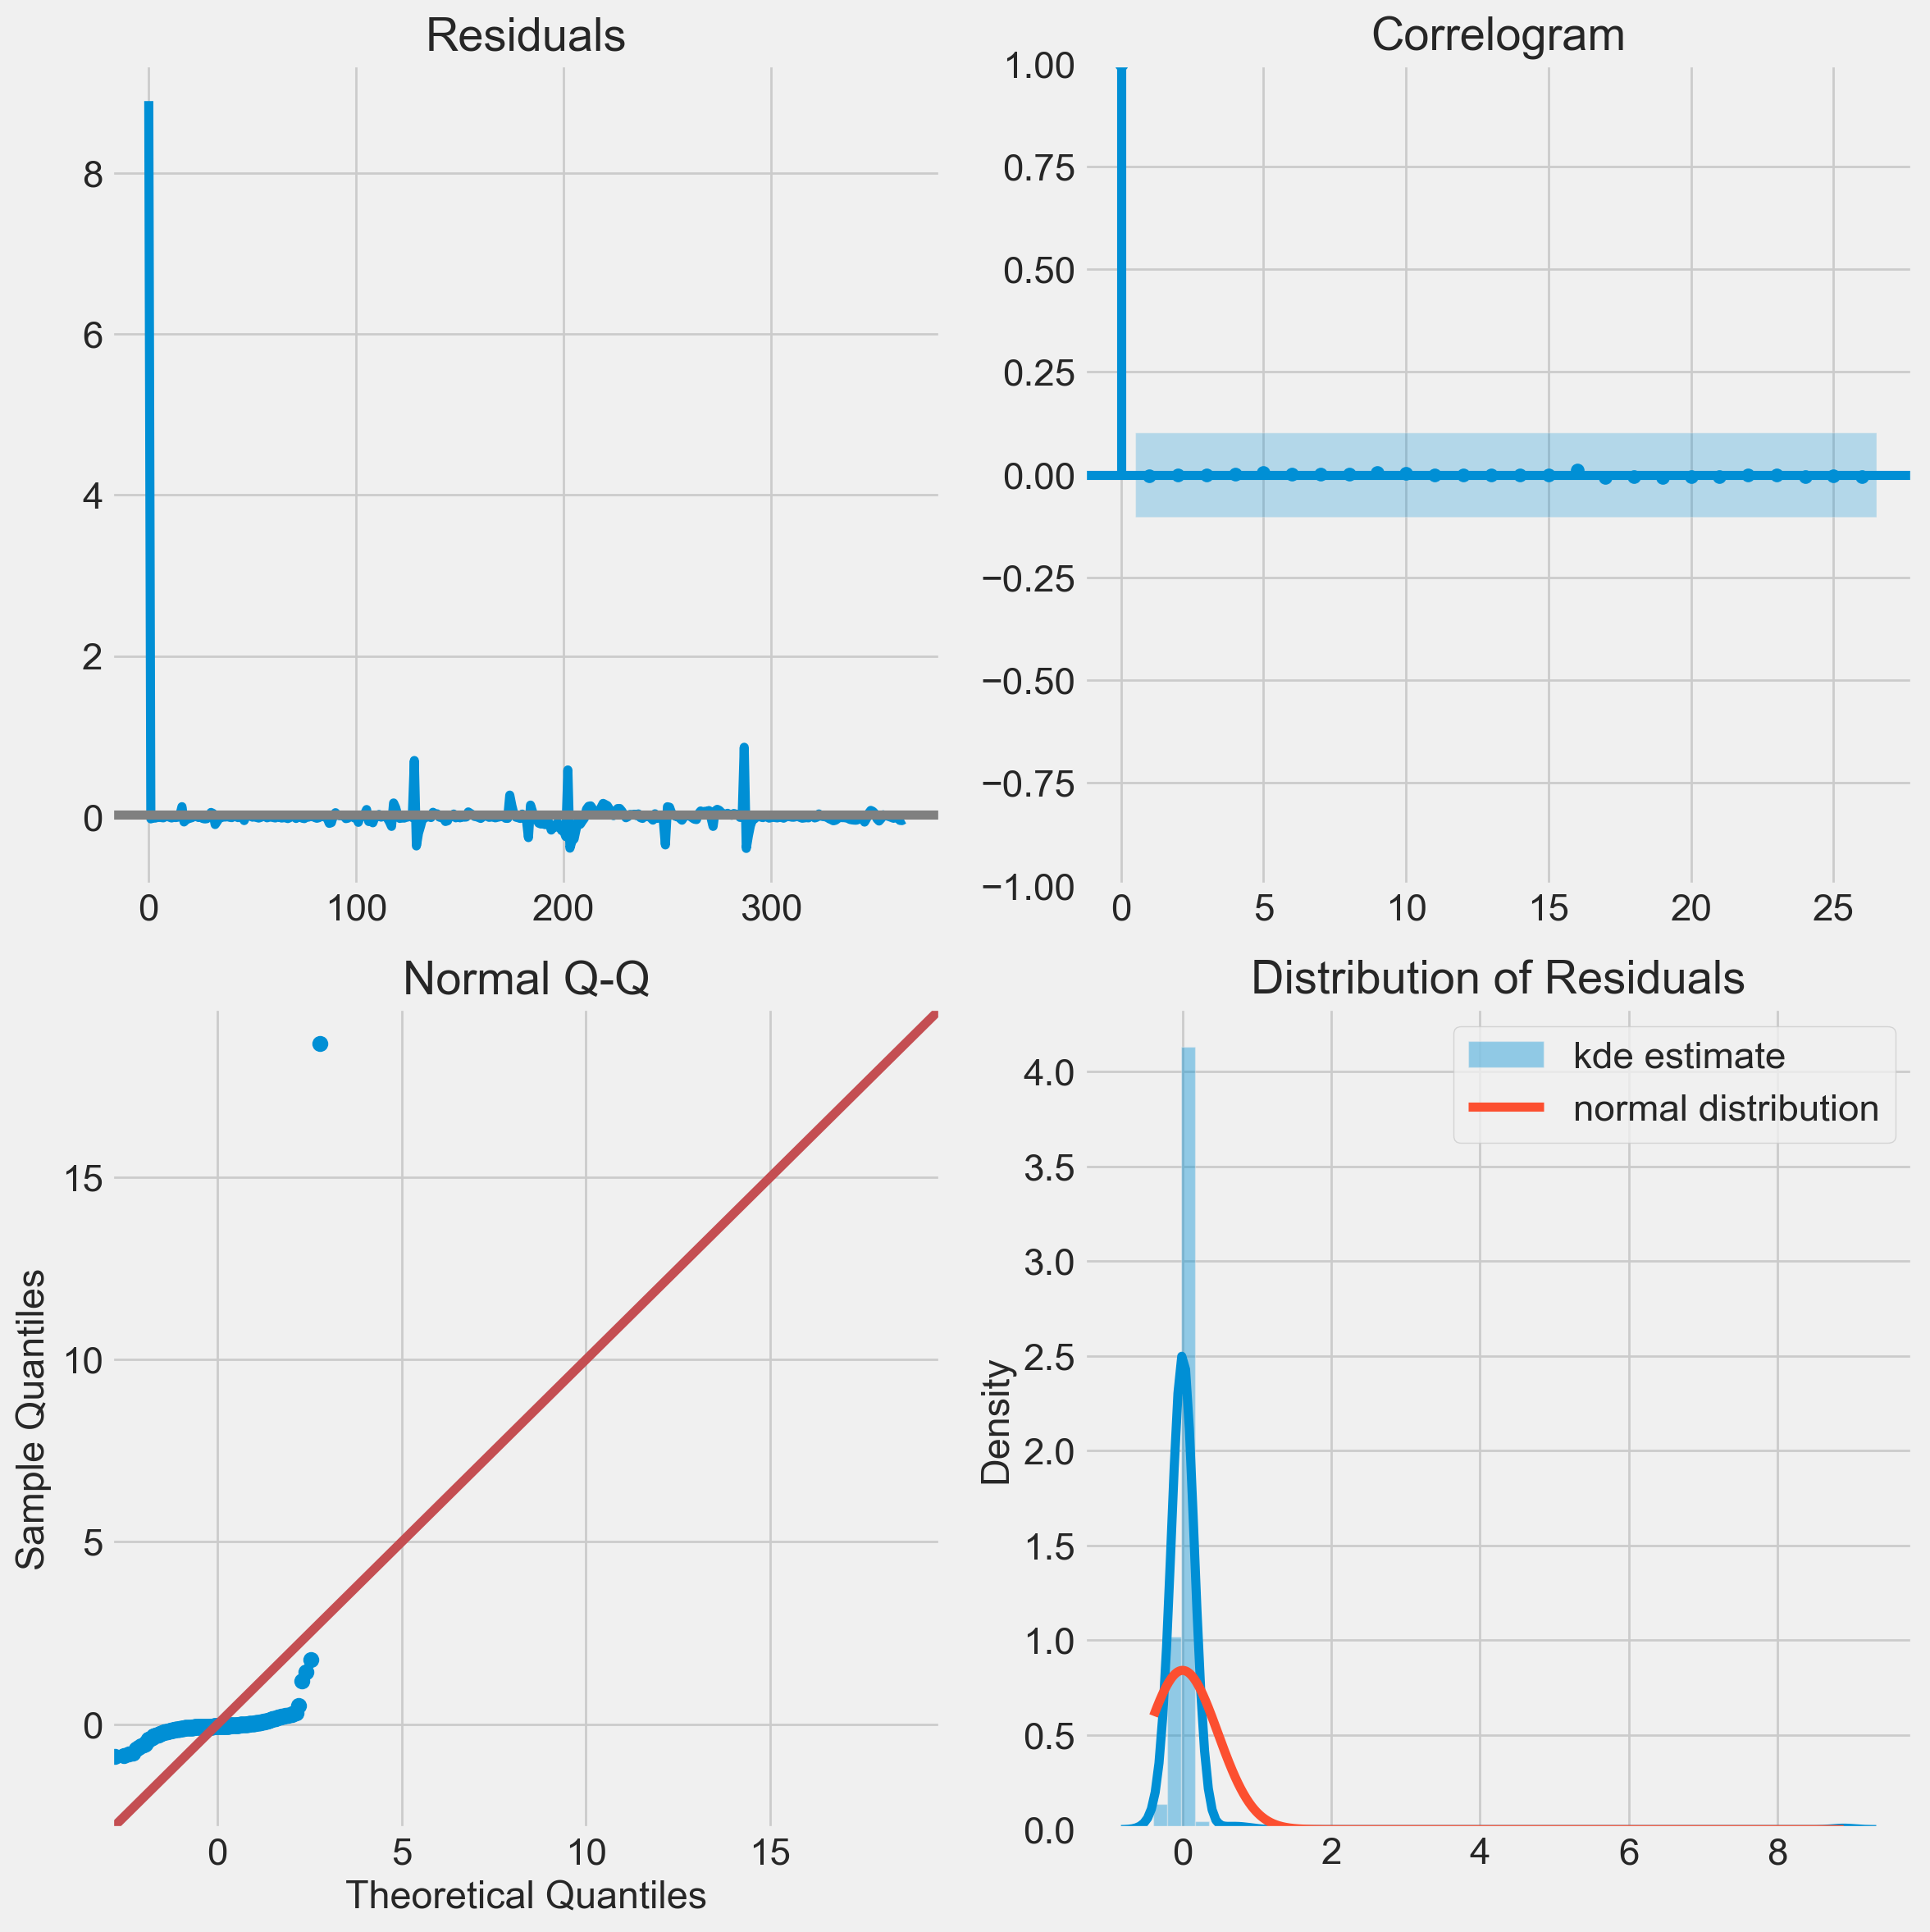

In [40]:
residual_plot(model_ar.resid.values)

In [41]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [42]:
mae = mean_absolute_error(X_test, forecast)
mape = mean_absolute_percentage_error(X_test,forecast)
mse = mean_squared_error(X_test,forecast)
rmse = np.sqrt(mean_squared_error(X_test,forecast))


print(f'MAE: {mae}')
print(f'MAPE: {mape}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

MAE: 0.16496951495612017
MAPE: 0.017682854597124105
MSE: 0.030553054720561534
RMSE: 0.1747943211908257


# Model Evaluation Interpertation
Residuals are the difference between the actual values of a time series and the fitted values predicted by the ARIMAX model. In other words, they represent the part of the time series that the model cannot explain.

The residuals and correlogram exhibit a normal distribution around zero. The Q-Q plot shows that the points on the plot generally fall along a straight line, with a single outlier. These outliers could explain the high Jarque-Bera and Heteroskedasticity scores.

Despite that, our residuals look relatively normally distributed. This suggests that the model isn't missing any important patterns in the data and the residuals are white noise. The presence of white noise in our residuals indicates that the model can adequately process the information in the data, resulting in more accurate forecasts.

Our model returns low error values, indicating our model is able to predict the chicken price with a high degree of accuracy. 

# Model Prediction Discussion & Recommendation

Our model predicts a flat and fixed price, this is not indicative of real world prices that fluctuate - despite desirable residuals and error values. Our model was able to closely predict the prices of its training set, as seen when comparing the actual prices and prediction from its training set in 2022 but predicted a flat line in the second half of 2023. 

Price increases and decreases in 2022 were only small and momentary spikes and roughly a ringgit in differences comapred to the mean of RM9 and as calculated in our standard deviation of ±0.32 . A linear prediction makes sense within our dataset timeframe as there were no greater spikes excedding the rough difference of a ringgit, as confirmed by our statistical summary. 

A dataset with a longer time-frame could help our model to predict prices more accurately, allowing it to be able to see the longer price increases over time.

This dataset was chosen as it incorporated the chicken prices sold at multiple locations, stores, and markets. This would allow for a greater understanding and incorporation of the mean prices of chicken prices around Malaysia.  

Chicken prices, and food prices in general, are affected by multiple economic factors such as, import and export, inflation, and ringgit purchasing power, to name a few; the incorporation of these factors in a machine learning model could give the model greater numerical context to the overall state of the economy to the price of chicken, possibly giving more precise and accurate prices of chicken. 

Based on our exploratory data analysis of mean chicken prices and the evaluation of our forecasting model; we were able to produce a general model that was able to predict prices accurately on a short-term basis but would have a lower confidence in forecasting longer prices without a larger dataset for training or the usage of a completely different model.